## **증강 전 데이터의 라벨 분포 시각화**

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
font = fm.FontProperties(fname=path, size=9)
plt.rc('font', family='NanumBarunGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [4]:
import os
import numpy as np
import pandas as pd
import cv2
import time
import math
import argparse
import random
import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
# Working Directory 변경
import os
os.chdir('/content/drive/Shareddrives/주제분석/data')

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

In [5]:
df = pd.read_csv('./final_train.csv')

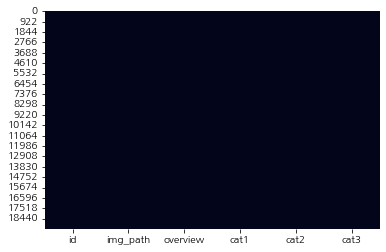

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font= 'NanumGothic')

## **1. "Category1"(대분류)의 label 분포**

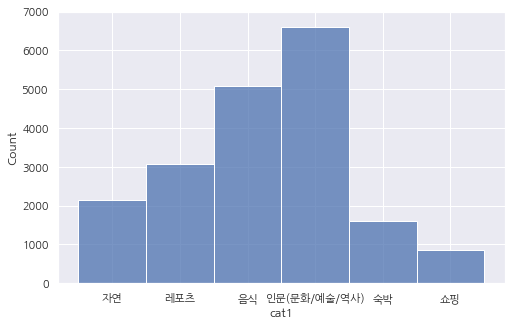

In [ ]:
plt.figure(figsize=(8, 5))
plt.ylim([0, 7000])
sns.histplot(x = df['cat1'])

## **2. "Category2"(중분류)의 label 분포**

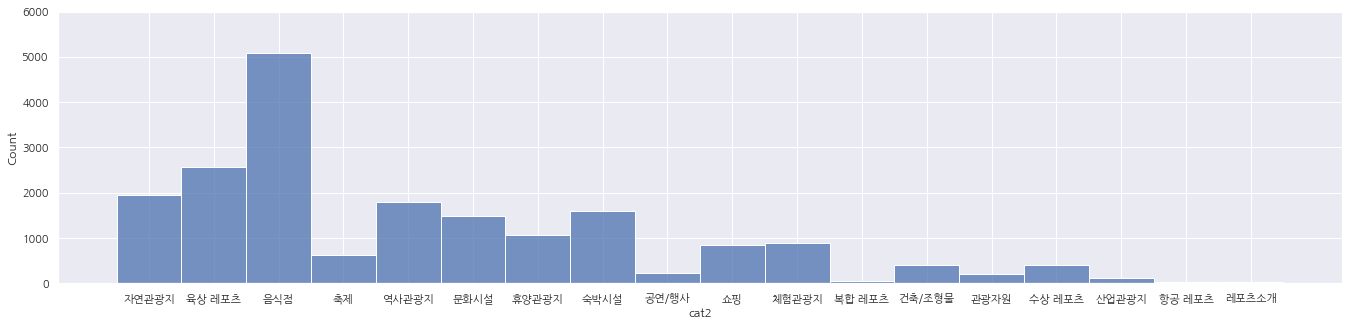

In [ ]:
plt.figure(figsize=(23, 5))
plt.ylim([0, 6000])
sns.histplot(x = df['cat2'])

## **3. "Category3"(소분류)의 label 분포**

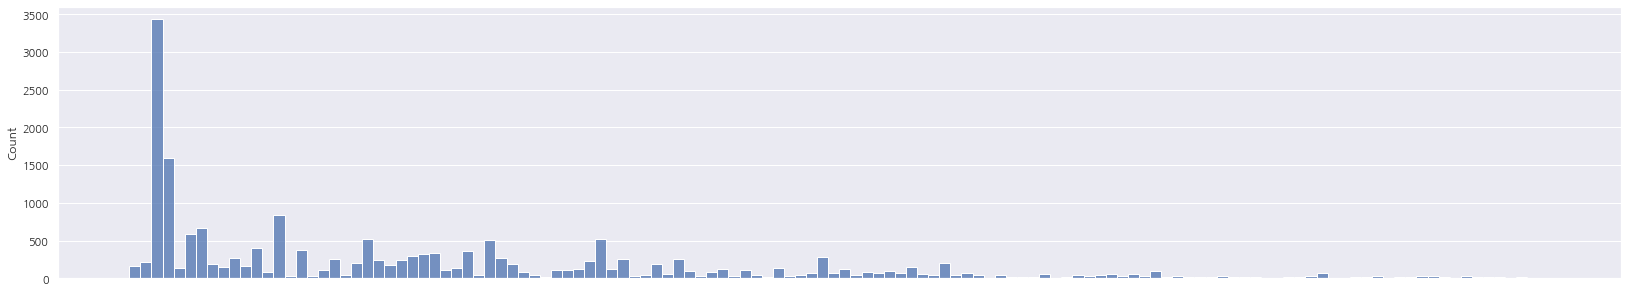

In [ ]:
plt.figure(figsize=(28, 5))
sns.histplot(x = df['cat3'])
plt.gca().axes.xaxis.set_visible(False)

### 데이터 증강 전 'category3'의 분류 별 개수

In [6]:
df['cat3'].value_counts(ascending=True) 

클래식음악회          2
뮤지컬             2
대중콘서트           2
MTB             2
스카이다이빙          2
             ... 
일반축제          549
유적지/사적지       629
바/까페          785
야영장,오토캠핑장    1550
한식           3433
Name: cat3, Length: 128, dtype: int64